<a href="https://colab.research.google.com/github/Aryan-Thapa/Stock-Price-Prediction/blob/main/Stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key="2f2b42a20c89191fe3f73bb137911b3f26f70079"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-2-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-11-08 00:00:00+00:00,208.49,210.12,206.75,209.98,25362636,50.090583,50.482197,49.672541,50.448562,101450544,0.73,1.0
1,AAPL,2018-11-09 00:00:00+00:00,204.47,206.01,202.25,205.55,34365750,49.124761,49.494753,48.591397,49.384236,137463000,0.00,1.0
2,AAPL,2018-11-12 00:00:00+00:00,194.17,199.85,193.79,199.00,51135518,46.650144,48.014787,46.558847,47.810571,204542072,0.00,1.0
3,AAPL,2018-11-13 00:00:00+00:00,192.23,197.18,191.45,191.63,46882936,46.184051,47.373309,45.996653,46.039898,187531744,0.00,1.0
4,AAPL,2018-11-14 00:00:00+00:00,186.80,194.48,185.93,193.90,60800957,44.879471,46.724623,44.670450,46.585275,243203828,0.00,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-10-31 00:00:00+00:00,170.77,170.90,167.90,169.35,44846017,170.77,170.90,167.90,169.35,44846017,0.0,1.0
1252,AAPL,2023-11-01 00:00:00+00:00,173.97,174.23,170.12,171.00,56934906,173.97,174.23,170.12,171.00,56934906,0.0,1.0
1253,AAPL,2023-11-02 00:00:00+00:00,177.57,177.78,175.46,175.52,77334752,177.57,177.78,175.46,175.52,77334752,0.0,1.0
1254,AAPL,2023-11-03 00:00:00+00:00,176.65,176.82,173.35,174.24,79829246,176.65,176.82,173.35,174.24,79829246,0.0,1.0
1255,AAPL,2023-11-06 00:00:00+00:00,179.23,179.43,176.21,176.38,63841310,179.23,179.43,176.21,176.38,63841310,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       208.49
1       204.47
2       194.17
3       192.23
4       186.80
         ...  
1251    170.77
1252    173.97
1253    177.57
1254    176.65
1255    179.23
Name: close, Length: 1256, dtype: float64

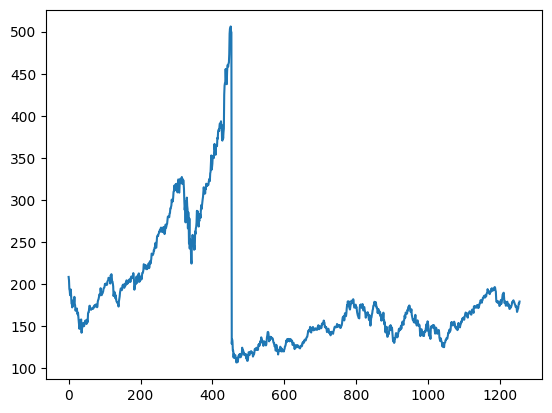

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [12]:
import numpy as np

In [13]:
df1

0       208.49
1       204.47
2       194.17
3       192.23
4       186.80
         ...  
1251    170.77
1252    173.97
1253    177.57
1254    176.65
1255    179.23
Name: close, Length: 1256, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.25460238]
 [0.2445335 ]
 [0.21873513]
 ...
 [0.17715717]
 [0.17485285]
 [0.18131497]]


In [57]:
model_file_name = 'scaler.joblib'
dump(scaler, model_file_name)

['scaler.joblib']

In [53]:
# Inverse transform to get the original values
unscaled_data = scaler.inverse_transform(df1)

# Create a new dataframe with the unscaled values
unscaled_df = pd.DataFrame(unscaled_data, columns=["close"])  # Replace "Feature Name" with an appropriate column name

# If you want to copy the index from the original dataframe to the new one:
#unscaled_df.index = df1.index

In [54]:
unscaled_df

,close
0,208.49
1,204.47
2,194.17
3,192.23
4,186.80
...,...
1251,170.77
1252,173.97
1253,177.57
1254,176.65


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(816, 440)

In [18]:
train_data

array([[2.54602379e-01],
       [2.44533500e-01],
       [2.18735128e-01],
       [2.13876018e-01],
       [2.00275517e-01],
       [2.11822167e-01],
       [2.17132123e-01],
       [1.97921102e-01],
       [1.75679399e-01],
       [1.75178460e-01],
       [1.63932373e-01],
       [1.69768316e-01],
       [1.68816531e-01],
       [1.85597996e-01],
       [1.82116468e-01],
       [1.79686913e-01],
       [1.95316218e-01],
       [1.74953037e-01],
       [1.70018785e-01],
       [1.54414527e-01],
       [1.57194740e-01],
       [1.54765185e-01],
       [1.55942392e-01],
       [1.60576080e-01],
       [1.46875391e-01],
       [1.43018159e-01],
       [1.48353162e-01],
       [1.35378835e-01],
       [1.25209768e-01],
       [1.09931121e-01],
       [1.00162805e-01],
       [1.26061365e-01],
       [1.23506575e-01],
       [1.23706951e-01],
       [1.27489042e-01],
       [1.27939887e-01],
       [8.85410144e-02],
       [1.03744521e-01],
       [1.02917971e-01],
       [1.09981215e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 201ms/step - loss: 0.0481 - val_loss: 0.0034
Epoch 2/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0176 - val_loss: 0.0033
Epoch 3/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0117 - val_loss: 3.4127e-04
Epoch 4/100
12/12 [==============================] - 1s 127ms/step - loss: 0.0097 - val_loss: 3.3754e-04
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0088 - val_loss: 3.7478e-04
Epoch 6/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0078 - val_loss: 4.4739e-04
Epoch 7/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0068 - val_loss: 3.5065e-04
Epoch 8/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0064 - val_loss: 5.8138e-04
Epoch 9/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 10/100
12/12 [==============================] - 2s 203ms/step

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.14.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 22ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.20660163117415

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

163.18355033771152

In [35]:
# Calculate RMSE performance metrics for training data
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print("Training RMSE:", train_rmse)

# Calculate RMSE performance metrics for testing data
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))
print("Testing RMSE:", test_rmse)


23/23 [==============================] - 1s 28ms/step
Training RMSE: 224.20660163117415
11/11 [==============================] - 0s 22ms/step
Testing RMSE: 163.18355033771152


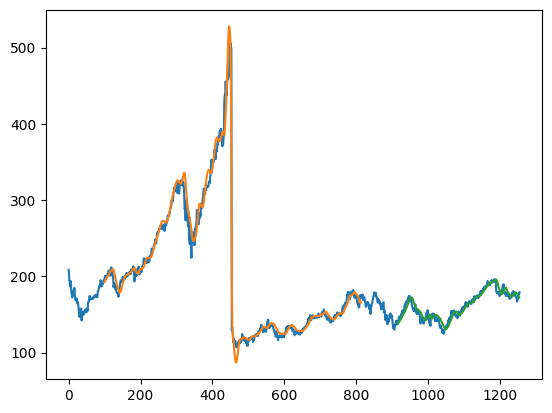

In [36]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823418910457104,
 0.21445209768315587,
 0.21162179085785848,
 0.21282404508453345,
 0.20999373825923606,
 0.20480901690670006,
 0.20348152786474638,
 0.20771446462116466,
 0.20964308077645577,
 0.21001878522229173,
 0.21828428303068248,
 0.2176330619912335,
 0.22106449592986843,
 0.21613024420788973,
 0.21314965560425791,
 0.215178459611772,
 0.21735754539762048,
 0.21956167814652466,
 0.21635566687539132,
 0.22289292423293672,
 0.22444583594239192,
 0.22232936756418276,
 0.21475266123982467,
 0.21122103944896675,
 0.1882279273638071,
 0.18036318096430803,
 0.18274264245460237,
 0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
      x_input = np.arange(99)  # Replace this with your actual data
      # Add one more element to match the desired shape (1, 100, 1)
      x_input = np.append(x_input, 0)  # Adding one element with value 0
      # Reshape the array to (1, 100, 1)
      n_steps = 100
      x_input = x_input.reshape((1, n_steps, 1))
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1
print(lst_output)

[1.8429747]
100
[1.8429747]
101
2 day input [0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879
 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846
 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584 0.22232937
 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264 0.17871008
 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621 0.16874139
 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.1718722

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1256

In [45]:
day_pred = np.arange(101, 131)  # Your code to create day_pred goes here

# Assuming scaler.inverse_transform(df1[1158:]) returns a numpy array of shape (99, 1)
# You can use np.squeeze() to remove the singleton dimension and convert it into a 1D array
data_to_plot = np.squeeze(scaler.inverse_transform(df1[1158:]))

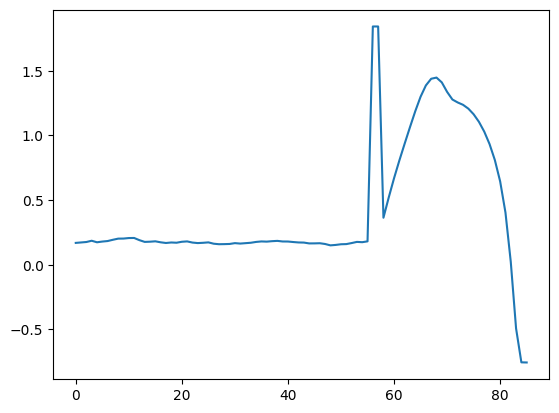

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

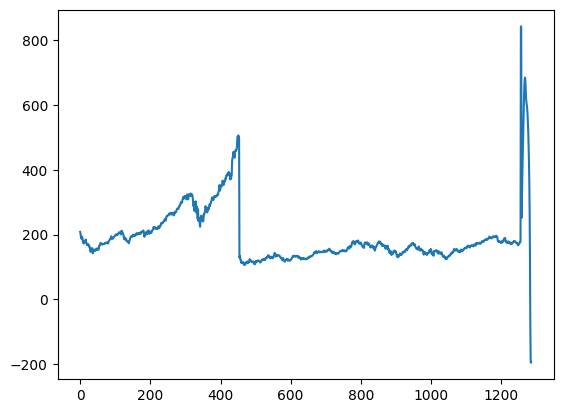

In [48]:
plt.plot(df3)

In [49]:
from joblib import dump

In [50]:
model_file_name = 'stock_prediction_model.joblib'
dump(model, model_file_name)

['stock_prediction_model.joblib']